# Introduction to Random Forest 

The random forest model uses many trees, and it makes a prediction by averaging the predictions of each component tree. It generally has much better predictive accuracy than a single decision tree and it works well with default parameters. If you keep modeling, you can learn more models with even better performance, but many of those are sensitive to getting the right parameters. 

By averaging the prediction results from decision tree means following:
Say, we have three prediction results from decision tree models: pred_1, pred_2, pred_3
We can get the ensembled result, 

pred_final = 0.2*pred_1 + 0.3*pred_2 + 0.5*pred_3

In that case, we weight the result from three models with weighting (0.2,0.3,0.5) respectively and we normally will adjust the weighting in order to get the ensembled result having lower loss.

In fact, when we run the random forest model with default parameters, we often can get a better accuracy than single decision tree model.
In addition, random forest model has far less parameters to tune for model optimization, we can often just assume the default is faily optimized one.

Random Forest is capable of doing both supervised regression problem and supervised classification problem.

# Random Forest Regressor

In [60]:
import pandas as pd
melbourne_data = pd.read_csv('data/melb_data.csv')

In [61]:
melbourne_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

In [62]:
melbourne_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/2/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/3/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/3/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/6/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [63]:
melbourne_data.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [64]:
melbourne_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize          4793
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

In [65]:
melbourne_data['Distance'].mean()

10.389986409350248

In [66]:
melbourne_data['Distance'].fillna(10, inplace= True)

In [67]:
melbourne_data['Landsize'].describe()

count     13603.000000
mean        558.116371
std        3987.326586
min           0.000000
25%         176.500000
50%         440.000000
75%         651.000000
max      433014.000000
Name: Landsize, dtype: float64

In [68]:
melbourne_data['Landsize'].fillna(558, inplace= True)

In [69]:
melbourne_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             1
Bedroom2          3469
Bathroom          3471
Car               3576
Landsize             0
BuildingArea     10634
YearBuilt         9438
CouncilArea       6163
Lattitude         3332
Longtitude        3332
Regionname           1
Propertycount        1
dtype: int64

# Modeling

In [70]:
y = melbourne_data.Price  # usually, we will make use of y as the target variable

# mannually selecting predictors is a traditional way but often effective if we have domain knowledge
melbourne_predictors = ['Rooms', 'Distance', 'Landsize']

X = melbourne_data[melbourne_predictors]  # by convention, we donate X as predictor


In [71]:
from sklearn.model_selection import train_test_split # split dataset into training and validation

train_X, test_X, train_y, test_y = train_test_split(X, y,random_state = 0) # random_state =0 so that others can get the same set of training and testing dataset

# for model evaluation with MAE
from sklearn.metrics import mean_absolute_error


In [72]:
# random forest is under ensemble method
from sklearn.ensemble import RandomForestRegressor

In [73]:
# running the random forest model with no model control and cross validation

# define, fit, predict and evaluation in simple four lines of code
rf_model = RandomForestRegressor()
rf_model.fit(train_X, train_y)
melb_preds = rf_model.predict(test_X)
print(mean_absolute_error(test_y, melb_preds))


284606.9039640689


Feature ranking:
1. feature 1 (0.397637)
2. feature 2 (0.309810)
3. feature 0 (0.292553)


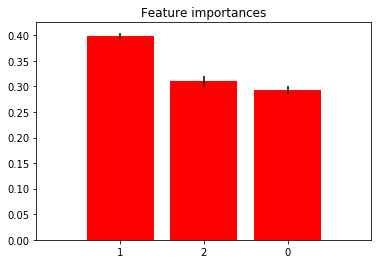

In [74]:
# Method 1: not that good chart

import numpy as np
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

Suburb = 0.2925531022874641
Address = 0.39763683064467353
Rooms = 0.3098100670678623


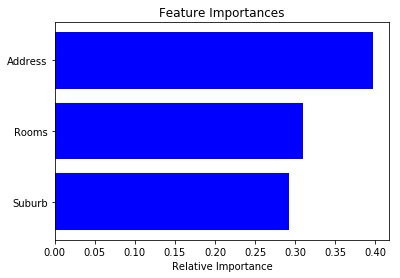

In [75]:
# Method 2: Better plot for Feature importance plot for feature engineering

feature_name = melbourne_data.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

for name, importance in zip(feature_name, rf_model.feature_importances_):
    print(name, "=", importance)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [16]:
# define user defined function to plot for partial dependency plot to check out how to tune parameter

def get_mae_rf(num_est, predictors_train, predictors_val, targ_train, targ_val):

    # fitting model with input max_leaf_nodes
    model = RandomForestRegressor(n_estimators=num_est, random_state=0)

    # fitting the model with training dataset
    model.fit(predictors_train, targ_train)

    # making prediction with the test dataset
    preds_val = model.predict(predictors_val)

    # calculate and return the MAE
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)


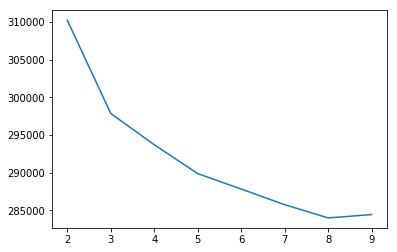

In [18]:
plot_mae = []
estimator = range(2,10)

for num_est  in range(2,10):
    my_mae = get_mae_rf(num_est,train_X,test_X,train_y,test_y)
    #print("Max Leaf nodes : %d \t\t Mean Absolute Error:  %d" %(num_est,my_mae))
    plot_mae.append(my_mae)

import matplotlib.pyplot as plt

plt.plot(estimator,plot_mae)


# Random Forest Classifier

In [44]:
import pandas as pd

data_file_path = 'data/iris.csv'
iris_data = pd.read_csv(data_file_path)

iris_data = iris_data.dropna(axis=0)


In [45]:
### Building model

# setting the predictor and the target variable

y = iris_data.Species  # usually, we will make use of y as the target variable

# mannually selecting predictors is a traditional way but often effective if we have domain knowledge
iris_predictors = ['SepalLength', 'SepalWidth']
X = iris_data[iris_predictors]  # by convention, we donate X as predictor


In [46]:
from sklearn.model_selection import train_test_split # split dataset into training and validation

train_X, test_X, train_y, test_y = train_test_split(X, y,random_state = 0) # random_state =0 so that others can get the same set of training and testing dataset



In [47]:
# random forest is under ensemble method
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [48]:
# define, fit, predict and evaluation in simple four lines of code
rf_model = RandomForestClassifier()
rf_model.fit(train_X, train_y)
iris_preds = rf_model.predict(test_X)
print(accuracy_score(test_y, iris_preds))


0.5789473684210527


SepalLength = 0.6702378725346625
SepalWidth = 0.3297621274653374


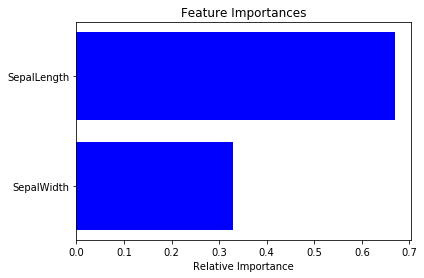

In [59]:
# Feature importance plot for feature engineering

feature_name = iris_data.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)

for name, importance in zip(feature_name, rf_model.feature_importances_):
    print(name, "=", importance)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [feature_name[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [24]:
# define user defined function to plot for partial dependency plot to check out how to tune parameter

def get_acc_rf(num_est, predictors_train, predictors_val, targ_train, targ_val):

    # fitting model with input max_leaf_nodes
    model = RandomForestClassifier(n_estimators=num_est, random_state=0)

    # fitting the model with training dataset
    model.fit(predictors_train, targ_train)

    # making prediction with the test dataset
    preds_val = model.predict(predictors_val)

    # calculate and return the MAE
    acc = accuracy_score(targ_val, preds_val)
    return(acc)


Max Leaf nodes : 2 		 Accuracy:  0.684
Max Leaf nodes : 3 		 Accuracy:  0.553
Max Leaf nodes : 4 		 Accuracy:  0.632
Max Leaf nodes : 5 		 Accuracy:  0.684
Max Leaf nodes : 6 		 Accuracy:  0.684
Max Leaf nodes : 7 		 Accuracy:  0.711
Max Leaf nodes : 8 		 Accuracy:  0.711
Max Leaf nodes : 9 		 Accuracy:  0.737
Max Leaf nodes : 10 		 Accuracy:  0.711
Max Leaf nodes : 11 		 Accuracy:  0.658
Max Leaf nodes : 12 		 Accuracy:  0.684
Max Leaf nodes : 13 		 Accuracy:  0.684
Max Leaf nodes : 14 		 Accuracy:  0.684
Max Leaf nodes : 15 		 Accuracy:  0.684
Max Leaf nodes : 16 		 Accuracy:  0.684
Max Leaf nodes : 17 		 Accuracy:  0.684
Max Leaf nodes : 18 		 Accuracy:  0.632
Max Leaf nodes : 19 		 Accuracy:  0.632


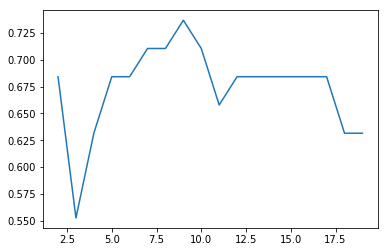

In [25]:
plot_acc = []
estimator = range(2,20)

for num_est  in range(2,20):
    my_acc = get_acc_rf(num_est,train_X,test_X,train_y,test_y)
    print("Max Leaf nodes : %d \t\t Accuracy:  %.3f" %(num_est,my_acc))
    plot_acc.append(my_acc)

import matplotlib.pyplot as plt

plt.plot(estimator,plot_acc)